Image shape: (256, 256)


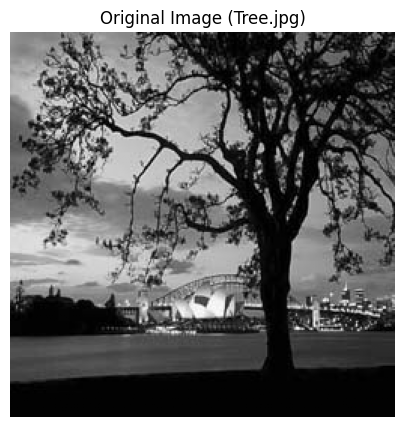

In [ ]:
# ================================
# Section 1: Loading libraries and reading the image
# ================================

import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from math import log10

# Reading the grayscale image
img = cv2.imread('Tree.jpg', cv2.IMREAD_GRAYSCALE)

# Image size
M, N = img.shape
print(f"Image shape: {img.shape}")

# Displaying the original image
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray')
plt.title('Original Image (Tree.jpg)')
plt.axis('off')
plt.show()


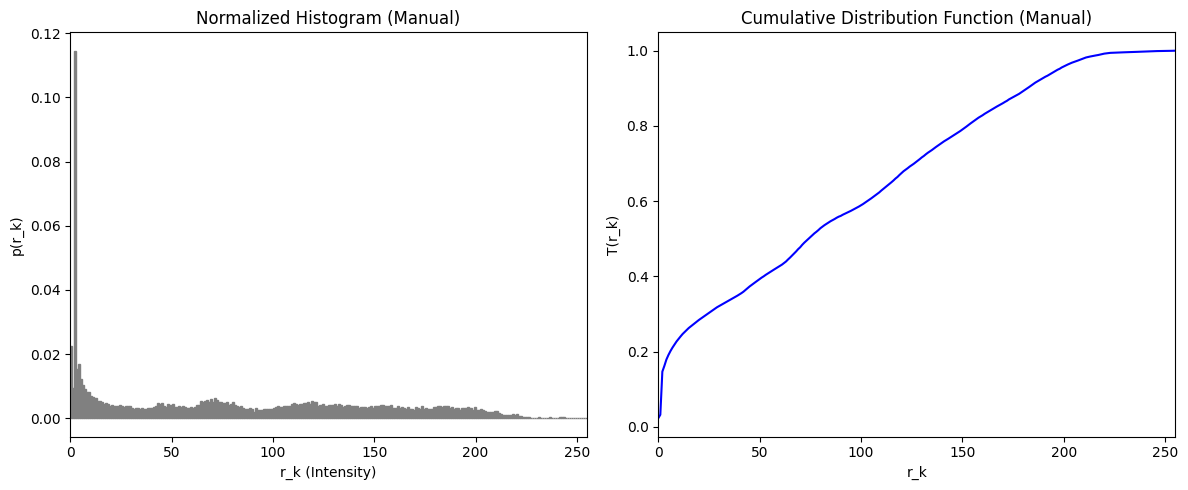

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Reading the image in grayscale
img = cv2.imread('Tree.jpg', cv2.IMREAD_GRAYSCALE)

# Image dimensions
M, N = img.shape
L = 256

# ================================
# Manual histogram calculation
# ================================
hist = np.zeros(L, dtype=np.int64)

for i in range(M):
    for j in range(N):
        intensity = img[i, j]
        hist[intensity] += 1

# ================================
# Histogram normalization
# ================================
p = hist / (M * N)

# ================================
# Manual CDF calculation
# ================================
T = np.zeros(L)
T[0] = p[0]
for k in range(1, L):
    T[k] = T[k - 1] + p[k]

# ================================
# Plotting normalized histogram and CDF manually
# ================================
plt.figure(figsize=(12, 5))

# Normalized histogram (without bars)
plt.subplot(1, 2, 1)
x = np.arange(L)
for k in range(L - 1):
    # Manually drawing the bars as rectangles
    plt.fill([k, k, k + 1, k + 1], [0, p[k], p[k], 0], color='gray')

plt.title('Normalized Histogram (Manual)')
plt.xlabel('r_k (Intensity)')
plt.ylabel('p(r_k)')
plt.xlim(0, 255)

# CDF
plt.subplot(1, 2, 2)
plt.plot(x, T, color='blue')
plt.title('Cumulative Distribution Function (Manual)')
plt.xlabel('r_k')
plt.ylabel('T(r_k)')
plt.xlim(0, 255)

plt.tight_layout()
plt.show()


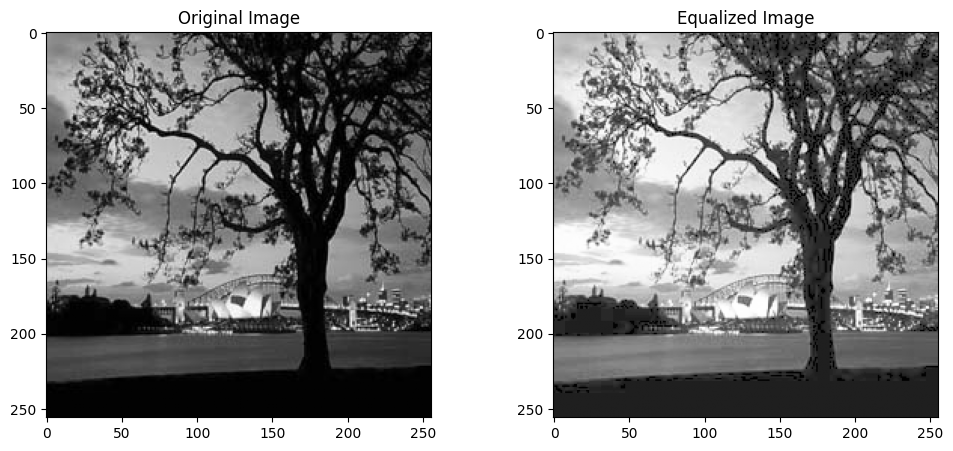

In [ ]:
# ================================
# Section 3: Performing Equalization manually
# ================================

# Calculating s_k = (L - 1) * T(r_k)
s = np.round((L - 1) * T).astype(np.uint8)

# Applying the mapping to the image
equalized_img = s[img]

# Calculating the histogram of the Equalized image
hist_eq = cv2.calcHist([equalized_img], [0], None, [L], [0, L]).ravel()
p_eq = hist_eq / (M * N)

# Displaying the original and Equalized images
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')

plt.show()


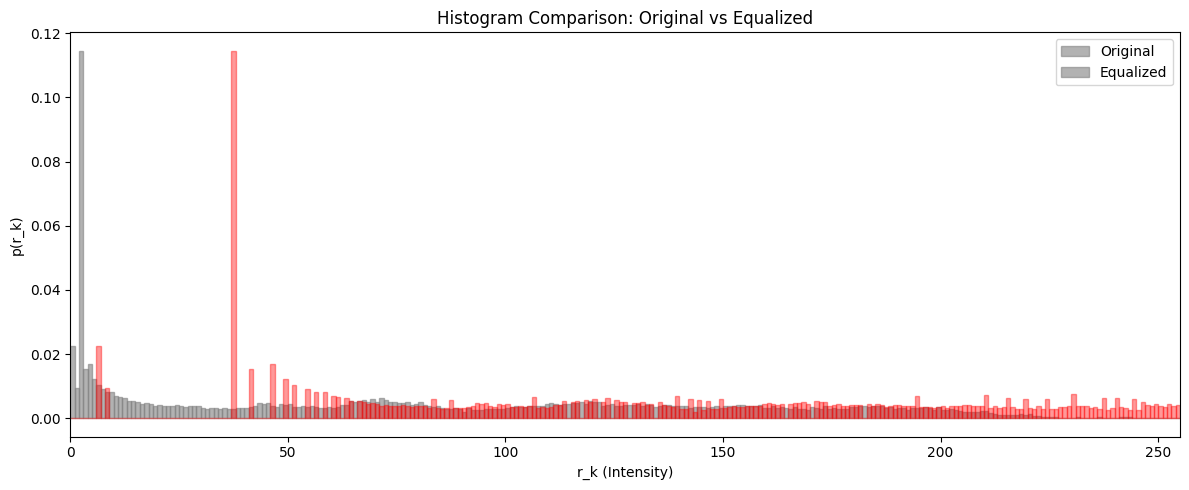

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# It is assumed that p and p_eq have been previously calculated (histograms of original and equalized images, respectively)
# Also, L = 256 has been defined earlier

plt.figure(figsize=(12,5))

x = np.arange(L)

# Plotting the original histogram (gray)
for k in range(L - 1):
    plt.fill([k, k, k + 1, k + 1], [0, p[k], p[k], 0],
             color='gray', alpha=0.6)

# Plotting the Equalized histogram (semi-transparent red)
for k in range(L - 1):
    plt.fill([k, k, k + 1, k + 1], [0, p_eq[k], p_eq[k], 0],
             color='red', alpha=0.4)

plt.title('Histogram Comparison: Original vs Equalized')
plt.xlabel('r_k (Intensity)')
plt.ylabel('p(r_k)')
plt.legend(['Original', 'Equalized'])
plt.xlim(0, 255)
plt.tight_layout()
plt.show()


In [ ]:
# ================================
# Section 5: Calculating metrics (Mean, Variance, Entropy, MSE, PSNR)
# ================================

def calc_entropy(hist_norm):
    return -np.sum([p_i * np.log2(p_i) for p_i in hist_norm if p_i > 0])

def calc_mse(img1, img2):
    return np.mean((img1.astype(np.float64) - img2.astype(np.float64)) ** 2)

def calc_psnr(mse, L=255):
    if mse == 0:
        return float('inf')
    return 10 * log10((L ** 2) / mse)

# Calculating statistical values
mean_orig = np.mean(img)
var_orig = np.var(img)
entropy_orig = calc_entropy(p)

mean_eq = np.mean(equalized_img)
var_eq = np.var(equalized_img)
entropy_eq = calc_entropy(p_eq)

# MSE and PSNR
mse = calc_mse(img, equalized_img)
psnr = calc_psnr(mse)

# Creating a results table
import pandas as pd

metrics = pd.DataFrame({
    'Metric': ['Mean', 'Variance', 'Entropy', 'MSE', 'PSNR (dB)'],
    'Original': [mean_orig, var_orig, entropy_orig, '-', '-'],
    'Equalized': [mean_eq, var_eq, entropy_eq, mse, psnr]
})

metrics.style.hide(axis='index')


Metric,Original,Equalized
Mean,83.284042,129.744308
Variance,4577.720330,5064.168432
Entropy,7.308640,7.134227
MSE,-,2251.839020
PSNR (dB),-,14.605430
